In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyecharts import *
%matplotlib inline

In [34]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [35]:
yili_data = pd.read_csv(r'yili_tmall.csv')
meng_data = pd.read_csv(r'mengniu_tmall.csv')

In [36]:
yili_labels = ['金典', '安慕希', '谷粒多', '拜拜君', '味可滋', '舒化', 'QQ星', '畅意', '无菌砖', '奶粉', '优酸乳']
meng_labels = ['特仑苏', '纯甄', '新养道', '未来星', '甜小嗨', '奶特', '真果粒', '酸酸乳', '早餐奶', '奶特', '精选牧场', '谷粒']
yili_label_list = []
meng_label_list = []
for i in yili_data['商品名']:
    for j in yili_labels:
        if j in i:
            yili_label_list.append(j)
            break
    else:
        yili_label_list.append('伊利')
for i in meng_data['商品名']:
    for j in meng_labels:
        if j in i:
            meng_label_list.append(j)
            break
    else:
        meng_label_list.append('蒙牛')
yili_data['品牌'] = yili_label_list
meng_data['品牌'] = meng_label_list

In [37]:
yili_nums = []
for i in yili_data['商品名']:
    if '2箱' in i or '2包' in i or '2罐' in i or '2袋' in i or '2筒' in i:
        yili_nums.append(2)
    elif '4箱'  in i or '4包' in i  or '4罐' in i  or '4袋' in i or '4筒' in i:
        yili_nums.append(4)
    else:
        yili_nums.append(1)
meng_nums = []
for i in meng_data['商品名']:
    if '2箱' in i or '2提' in i or '+' in i:
        meng_nums.append(2)
    elif '4箱'  in i or '4提' in i:
        meng_nums.append(4)
    else:
        meng_nums.append(1)

In [38]:
yili_data

,时间,商品名,价格,销量,品牌
0,2017-8-13,伊利暖哄哄女士生理期经期奶粉礼盒装 补铁配方 给她暖烘烘,409.0,133,奶粉
1,2017-8-13,伊利直营欣活配方奶粉 中老年成人营养奶粉900g*2罐,252.0,3110,奶粉
2,2017-8-13,伊利新西兰进口全脂奶粉1kg*2包,196.0,2236,奶粉
3,2017-8-13,【伊利】【包邮】金典纯牛奶250ml*16盒2箱,173.4,951,金典
4,2017-8-13,【包邮】伊利牛奶 拜拜君脱脂牛奶250ml*16*2箱,160.0,2263,拜拜君
5,2017-8-13,伊利直营女士高蛋白高钙脱脂成人奶粉4袋*400g,152.0,6213,奶粉
6,2017-8-13,【包邮】伊利 金典有机纯牛奶250ml*12*2箱,152.0,12302,金典
7,2017-8-13,伊利官方直营 高锌高钙学生奶粉 400g*4袋,144.0,10602,奶粉
8,2017-8-13,伊利中老年多维高钙奶粉 400g*4袋,144.0,3365,奶粉
9,2017-8-13,伊利女士高铁高钙奶粉4袋*400g,144.0,7147,奶粉


In [39]:
yili_data['销售额'] = yili_data['价格'] * yili_data['销量']
meng_data['销售额'] = meng_data['价格'] * meng_data['销量']
yili_data['价格'] = yili_data['价格']/yili_nums
yili_data['销量'] = yili_data['销量']*yili_nums
meng_data['价格'] = meng_data['价格']/meng_nums
meng_data['销量'] = meng_data['销量']*meng_nums

In [40]:
yili_0813 = yili_data[yili_data['时间']=='2017-8-13']
meng_0813 = meng_data[meng_data['时间']=='2017-8-13']

In [41]:
yili_0813.describe()
meng_0813.describe()

,价格,销量,销售额
count,81.000000,81.000000,8.100000e+01
mean,58.288889,14554.345679,7.341514e+05
std,44.460522,31110.536703,1.493829e+06
min,23.800000,102.000000,6.120000e+03
25%,36.800000,1535.000000,7.974400e+04
50%,50.000000,5071.000000,3.133512e+05
75%,61.200000,14404.000000,6.337760e+05
max,409.000000,251324.000000,1.118392e+07


,价格,销量,销售额
count,48.000000,48.000000,4.800000e+01
mean,49.796875,58950.520833,3.368446e+06
std,15.307537,88718.700442,7.119250e+06
min,26.400000,38.000000,1.744200e+03
25%,39.900000,8726.750000,3.630119e+05
50%,45.900000,18456.000000,9.228000e+05
75%,59.850000,78563.500000,3.794998e+06
max,99.000000,479140.000000,4.743486e+07


In [42]:
yili_price = yili_0813.sort_values(by='价格', ascending=False)
meng_price = meng_0813.sort_values(by='价格', ascending=False)
yili_sales_count = yili_0813.sort_values(by='销量', ascending=False)
meng_sales_count = meng_0813.sort_values(by='销量', ascending=False)
yili_sales_income = yili_0813.sort_values(by='销售额', ascending=False)
meng_sales_income = meng_0813.sort_values(by='销售额', ascending=False)

In [43]:
yili_price.head(10)
meng_price.head(10)

,时间,商品名,价格,销量,品牌,销售额
0,2017-8-13,伊利暖哄哄女士生理期经期奶粉礼盒装 补铁配方 给她暖烘烘,409.0,133,奶粉,54397.0
17,2017-8-13,伊利直营 欣活成人奶粉中老年配方奶粉900g单听装罐装,126.0,930,奶粉,117180.0
1,2017-8-13,伊利直营欣活配方奶粉 中老年成人营养奶粉900g*2罐,126.0,6220,奶粉,783720.0
23,2017-8-13,伊利直营 果享学生奶粉学生粉900g单听装罐装,119.0,2121,奶粉,252399.0
2,2017-8-13,伊利新西兰进口全脂奶粉1kg*2包,98.0,4472,奶粉,438256.0
32,2017-8-13,【2提包邮】伊利 安慕希酸奶原味酸奶16*205g*1箱 早餐牛奶,88.0,65495,安慕希,5763560.0
3,2017-8-13,【伊利】【包邮】金典纯牛奶250ml*16盒2箱,86.7,1902,金典,164903.4
4,2017-8-13,【包邮】伊利牛奶 拜拜君脱脂牛奶250ml*16*2箱,80.0,4526,拜拜君,362080.0
35,2017-8-13,伊利新西兰进口全脂奶粉1kg,79.0,1015,奶粉,80185.0
6,2017-8-13,【包邮】伊利 金典有机纯牛奶250ml*12*2箱,76.0,24604,金典,1869904.0


,时间,商品名,价格,销量,品牌,销售额
17,2017-8-13,蒙牛纯甄风味酸牛奶200g*24盒整箱 经典原味酸奶 好味道 不添加,99.0,479140,纯甄,47434860.0
24,2017-8-13,蒙牛特仑苏纯牛奶250ml*16包 醇香新贵族 贵在优蛋白,81.7,91249,特仑苏,7455043.3
4,2017-8-13,蒙牛旗舰店 纯甄常温酸牛奶200g*16盒 好酸奶不添加 原味酸奶,75.9,1690,纯甄,128271.0
21,2017-8-13,蒙牛真果粒缤纷礼盒装250g*24包*2提 牛奶饮品,73.1,150474,真果粒,10999649.4
9,2017-8-13,蒙牛旗舰店 真果粒缤纷礼盒装250g*24包整箱 牛奶饮品,73.1,92380,真果粒,6752978.0
23,2017-8-13,蒙牛旗舰店 特仑苏有机奶250ml*12盒,68.4,36161,特仑苏,2473412.4
35,2017-8-13,蒙牛纯甄风味酸牛奶200g*12盒整箱 极限挑战定制版（形象随机）,66.0,34048,纯甄,2247168.0
37,2017-8-13,特仑苏纯牛奶250ml*12盒*2提,65.0,16890,特仑苏,1097850.0
11,2017-8-13,蒙牛旗舰店 特仑苏纯牛奶250ml*12盒*2箱,65.0,128094,特仑苏,8326110.0
16,2017-8-13,蒙牛旗舰店 特仑苏纯牛奶250ml*12盒整箱,65.0,50730,特仑苏,3297450.0


In [44]:
yili_price.tail(10)
meng_price.tail(10)

,时间,商品名,价格,销量,品牌,销售额
11,2017-8-13,伊利全脂营养奶粉400g*4袋,33.8,7712,奶粉,260665.6
78,2017-8-13,伊利女士营养奶粉400g袋装,32.0,380,奶粉,12160.0
76,2017-8-13,伊利学生营养奶粉400g,32.0,1535,奶粉,49120.0
77,2017-8-13,伊利中老年营养奶粉400g,32.0,1300,奶粉,41600.0
16,2017-8-13,伊利女士营养奶粉400g*4袋,32.0,10304,奶粉,329728.0
14,2017-8-13,【包邮】伊利 中老年营养奶粉 成人奶粉400g*4袋,32.0,28484,奶粉,911488.0
15,2017-8-13,伊利学生营养奶粉400g*4袋,32.0,2492,奶粉,79744.0
79,2017-8-13,伊利全脂营养奶粉400g,29.8,2562,奶粉,76347.6
28,2017-8-13,伊利全脂甜奶粉400g*4袋早餐必备,23.8,19976,奶粉,475428.8
80,2017-8-13,伊利全脂甜奶粉400g,23.8,259,奶粉,6164.2


,时间,商品名,价格,销量,品牌,销售额
5,2017-8-13,蒙牛真果粒桃果粒牛奶饮品250ml*12盒,37.8,9654,真果粒,364921.2
6,2017-8-13,蒙牛 新养道零乳糖牛奶低脂型250ml*12盒整箱,36.9,3034,新养道,111954.6
28,2017-8-13,蒙牛旗舰店 新养道零乳糖牛奶低脂型250ml*12盒整箱,36.9,185627,新养道,6849636.3
38,2017-8-13,蒙牛 黑谷谷粒早餐牛奶饮品250ml*12盒整箱 黑豆黑芝麻黑小麦小米,32.4,10810,谷粒,350244.0
1,2017-8-13,蒙牛 红谷谷粒早餐牛奶饮品250ml*12盒整箱 红豆红米小米红高粱,32.4,13174,谷粒,426837.6
26,2017-8-13,蒙牛黑谷谷粒牛奶饮品250ml*12盒*2箱,32.4,62182,谷粒,2014696.8
19,2017-8-13,蒙牛旗舰店 红谷谷粒早餐谷物牛奶饮品250ml*12盒*2箱,32.4,59526,谷粒,1928642.4
22,2017-8-13,蒙牛旗舰店 纯甄风味酸牛奶200g*6包,28.0,2704,纯甄,75712.0
45,2017-8-13,蒙牛纯甄风味酸牛奶200g*6盒*2箱,28.0,297102,纯甄,8318856.0
31,2017-8-13,蒙牛旗舰店 纯甄风味酸牛奶200g*6包*2箱,26.4,8726,纯甄,230366.4


In [48]:
yili_sales_count.head(10)
meng_sales_count.head(10)

,时间,商品名,价格,销量,品牌,销售额
30,2017-8-13,【包邮】伊利谷粒多燕麦牛奶200ml*12盒*2箱谷物早餐奶,44.5,251324,谷粒多,11183918.0
37,2017-8-13,【包邮】伊利谷粒多红谷谷物牛奶红豆花生奶250ml*12盒*2箱,36.0,77476,谷粒多,2789136.0
32,2017-8-13,【2提包邮】伊利 安慕希酸奶原味酸奶16*205g*1箱 早餐牛奶,88.0,65495,安慕希,5763560.0
53,2017-8-13,【2件包邮】伊利牛奶 拜拜君 脱脂牛奶 250ml*16盒 0脂肪脱脂奶,59.9,62698,拜拜君,3755610.2
36,2017-8-13,【包邮】伊利谷粒多黑谷谷物牛奶250ml*12*2箱,36.0,55696,谷粒多,2005056.0
21,2017-8-13,【包邮】伊利 味可滋巧克力牛奶 早餐牛奶240ml*12盒*2箱,60.0,51914,味可滋,3114840.0
7,2017-8-13,伊利官方直营 高锌高钙学生奶粉 400g*4袋,36.0,42408,奶粉,1526688.0
43,2017-8-13,伊利安慕希原味酸奶205g*12*1箱,66.0,28817,安慕希,1901922.0
9,2017-8-13,伊利女士高铁高钙奶粉4袋*400g,36.0,28588,奶粉,1029168.0
14,2017-8-13,【包邮】伊利 中老年营养奶粉 成人奶粉400g*4袋,32.0,28484,奶粉,911488.0


,时间,商品名,价格,销量,品牌,销售额
17,2017-8-13,蒙牛纯甄风味酸牛奶200g*24盒整箱 经典原味酸奶 好味道 不添加,99.0,479140,纯甄,47434860.0
45,2017-8-13,蒙牛纯甄风味酸牛奶200g*6盒*2箱,28.0,297102,纯甄,8318856.0
2,2017-8-13,蒙牛旗舰店 纯牛奶PURE MILK 250ml*16盒整箱,43.2,208309,蒙牛,8998948.8
28,2017-8-13,蒙牛旗舰店 新养道零乳糖牛奶低脂型250ml*12盒整箱,36.9,185627,新养道,6849636.3
21,2017-8-13,蒙牛真果粒缤纷礼盒装250g*24包*2提 牛奶饮品,73.1,150474,真果粒,10999649.4
13,2017-8-13,蒙牛旗舰店 纯牛奶250ml*16盒整箱 早餐牛奶 好牛奶自然纯,43.2,133024,蒙牛,5746636.8
11,2017-8-13,蒙牛旗舰店 特仑苏纯牛奶250ml*12盒*2箱,65.0,128094,特仑苏,8326110.0
46,2017-8-13,蒙牛旗舰店 早餐奶核桃味牛奶250ml*16盒整箱,41.9,127303,早餐奶,5333995.7
27,2017-8-13,蒙牛旗舰店 早餐奶麦香味250ml*16盒整箱 原麦牛奶,43.9,112621,早餐奶,4944061.9
32,2017-8-13,蒙牛旗舰店 特仑苏醇纤牛奶250ml*12盒整箱,57.8,101889,特仑苏,5889184.2


In [49]:
yili_sales_income.head(10)
meng_sales_income.head(10)

,时间,商品名,价格,销量,品牌,销售额
30,2017-8-13,【包邮】伊利谷粒多燕麦牛奶200ml*12盒*2箱谷物早餐奶,44.5,251324,谷粒多,11183918.0
32,2017-8-13,【2提包邮】伊利 安慕希酸奶原味酸奶16*205g*1箱 早餐牛奶,88.0,65495,安慕希,5763560.0
53,2017-8-13,【2件包邮】伊利牛奶 拜拜君 脱脂牛奶 250ml*16盒 0脂肪脱脂奶,59.9,62698,拜拜君,3755610.2
21,2017-8-13,【包邮】伊利 味可滋巧克力牛奶 早餐牛奶240ml*12盒*2箱,60.0,51914,味可滋,3114840.0
37,2017-8-13,【包邮】伊利谷粒多红谷谷物牛奶红豆花生奶250ml*12盒*2箱,36.0,77476,谷粒多,2789136.0
36,2017-8-13,【包邮】伊利谷粒多黑谷谷物牛奶250ml*12*2箱,36.0,55696,谷粒多,2005056.0
43,2017-8-13,伊利安慕希原味酸奶205g*12*1箱,66.0,28817,安慕希,1901922.0
6,2017-8-13,【包邮】伊利 金典有机纯牛奶250ml*12*2箱,76.0,24604,金典,1869904.0
22,2017-8-13,【包邮】伊利味可滋香蕉牛奶240ml*12盒*2箱,60.0,27464,味可滋,1647840.0
7,2017-8-13,伊利官方直营 高锌高钙学生奶粉 400g*4袋,36.0,42408,奶粉,1526688.0


,时间,商品名,价格,销量,品牌,销售额
17,2017-8-13,蒙牛纯甄风味酸牛奶200g*24盒整箱 经典原味酸奶 好味道 不添加,99.0,479140,纯甄,47434860.0
21,2017-8-13,蒙牛真果粒缤纷礼盒装250g*24包*2提 牛奶饮品,73.1,150474,真果粒,10999649.4
2,2017-8-13,蒙牛旗舰店 纯牛奶PURE MILK 250ml*16盒整箱,43.2,208309,蒙牛,8998948.8
11,2017-8-13,蒙牛旗舰店 特仑苏纯牛奶250ml*12盒*2箱,65.0,128094,特仑苏,8326110.0
45,2017-8-13,蒙牛纯甄风味酸牛奶200g*6盒*2箱,28.0,297102,纯甄,8318856.0
24,2017-8-13,蒙牛特仑苏纯牛奶250ml*16包 醇香新贵族 贵在优蛋白,81.7,91249,特仑苏,7455043.3
28,2017-8-13,蒙牛旗舰店 新养道零乳糖牛奶低脂型250ml*12盒整箱,36.9,185627,新养道,6849636.3
9,2017-8-13,蒙牛旗舰店 真果粒缤纷礼盒装250g*24包整箱 牛奶饮品,73.1,92380,真果粒,6752978.0
32,2017-8-13,蒙牛旗舰店 特仑苏醇纤牛奶250ml*12盒整箱,57.8,101889,特仑苏,5889184.2
13,2017-8-13,蒙牛旗舰店 纯牛奶250ml*16盒整箱 早餐牛奶 好牛奶自然纯,43.2,133024,蒙牛,5746636.8


In [19]:
yili_0813[yili_0813['品牌']=='金典']
yili_0813[yili_0813['品牌']=='安慕希']
meng_0813[meng_0813['品牌']=='特仑苏']
meng_0813[meng_0813['品牌']=='纯甄']

,时间,商品名,价格,销量,品牌,销售额
3,2017-8-13,【伊利】【包邮】金典纯牛奶250ml*16盒2箱,21.675,7608,金典,164903.4
6,2017-8-13,【包邮】伊利 金典有机纯牛奶250ml*12*2箱,19.000,98416,金典,1869904.0
10,2017-8-13,伊利牛奶金典低脂调制乳250ml*12盒2箱装正品保证,17.000,3976,金典,67592.0
38,2017-8-13,【伊利旗舰店】【2件包邮】伊利金典有机纯牛奶250ml*12盒/箱,68.400,14468,金典,989611.2
39,2017-8-13,【2件包邮】伊利 金典纯牛奶250ml*16*1箱 早餐奶,68.000,18281,金典,1243108.0
45,2017-8-13,【2件包邮】伊利 金典低脂调制乳牛奶250ml*12盒/箱,61.200,4188,金典,256305.6


,时间,商品名,价格,销量,品牌,销售额
29,2017-8-13,【包邮】伊利安慕希常温酸奶蓝莓味8*205g*2箱,11.6,92656,安慕希,1074809.6
31,2017-8-13,【包邮】安慕希常温酸奶香草味8*205g*2箱,11.0,57616,安慕希,633776.0
32,2017-8-13,【2提包邮】伊利 安慕希酸奶原味酸奶16*205g*1箱 早餐牛奶,88.0,65495,安慕希,5763560.0
43,2017-8-13,伊利安慕希原味酸奶205g*12*1箱,66.0,28817,安慕希,1901922.0
65,2017-8-13,伊利安慕希常温酸奶蓝莓味8*205g*1箱,46.4,2489,安慕希,115489.6
66,2017-8-13,安慕希常温酸奶香草味8*205g*1箱,44.0,1439,安慕希,63316.0


,时间,商品名,价格,销量,品牌,销售额
3,2017-8-13,蒙牛特仑苏纯牛奶250ml×8包整箱 醇香新贵族 贵在优蛋白,42.80,19390,特仑苏,829892.0
8,2017-8-13,蒙牛旗舰店 特仑苏低脂牛奶250ml*12盒,61.20,27686,特仑苏,1694383.2
11,2017-8-13,蒙牛旗舰店 特仑苏纯牛奶250ml*12盒*2箱,16.25,512376,特仑苏,8326110.0
16,2017-8-13,蒙牛旗舰店 特仑苏纯牛奶250ml*12盒整箱,65.00,50730,特仑苏,3297450.0
23,2017-8-13,蒙牛旗舰店 特仑苏有机奶250ml*12盒,68.40,36161,特仑苏,2473412.4
24,2017-8-13,蒙牛特仑苏纯牛奶250ml*16包 醇香新贵族 贵在优蛋白,81.70,91249,特仑苏,7455043.3
32,2017-8-13,蒙牛旗舰店 特仑苏醇纤牛奶250ml*12盒整箱,57.80,101889,特仑苏,5889184.2
34,2017-8-13,特仑苏纯牛奶250ml*8盒*2提 共16盒,10.70,148792,特仑苏,1592074.4
37,2017-8-13,特仑苏纯牛奶250ml*12盒*2提,16.25,67560,特仑苏,1097850.0
40,2017-8-13,蒙牛特仑苏低脂牛奶250ml*12盒,61.20,51012,特仑苏,3121934.4


,时间,商品名,价格,销量,品牌,销售额
4,2017-8-13,蒙牛旗舰店 纯甄常温酸牛奶200g*16盒 好酸奶不添加 原味酸奶,75.9,1690,纯甄,128271.0
17,2017-8-13,蒙牛纯甄风味酸牛奶200g*24盒整箱 经典原味酸奶 好味道 不添加,99.0,479140,纯甄,47434860.0
18,2017-8-13,【变5定制】蒙牛纯甄风味酸牛奶200g*12盒整箱 经典原味酸奶,59.4,472,纯甄,28036.8
22,2017-8-13,蒙牛旗舰店 纯甄风味酸牛奶200g*6包,28.0,2704,纯甄,75712.0
31,2017-8-13,蒙牛旗舰店 纯甄风味酸牛奶200g*6包*2箱,6.6,34904,纯甄,230366.4
35,2017-8-13,蒙牛纯甄风味酸牛奶200g*12盒整箱 极限挑战定制版（形象随机）,66.0,34048,纯甄,2247168.0
45,2017-8-13,蒙牛纯甄风味酸牛奶200g*6盒*2箱,7.0,1188408,纯甄,8318856.0


In [20]:
yili_0813.groupby('品牌').sum().sort_values(by='销售额', ascending=False)
meng_0813.groupby('品牌').sum().sort_values(by='销售额', ascending=False)

,价格,销量,销售额
品牌,,,
谷粒多,211.500,1626048,18338839.0
安慕希,267.000,248512,9552873.2
奶粉,1172.325,2931401,8354301.2
味可滋,375.000,346988,5758320.0
金典,255.275,146937,4591424.2
拜拜君,139.800,84672,4349503.2
舒化,297.000,220058,3912427.2
QQ星,343.600,42068,1942897.4
无菌砖,112.800,27084,1385224.8


,价格,销量,销售额
品牌,,,
纯甄,341.9000,1741366,58463270.2
特仑苏,481.3000,1106845,35777333.9
真果粒,166.9750,719355,18700613.6
蒙牛,238.5000,423290,18562290.3
早餐奶,127.7000,285767,12198879.3
新养道,126.0375,204318,7557184.5
谷粒,129.0000,512286,4790980.8
奶特,150.0000,54742,2737100.0
甜小嗨,152.7000,23285,1184115.5


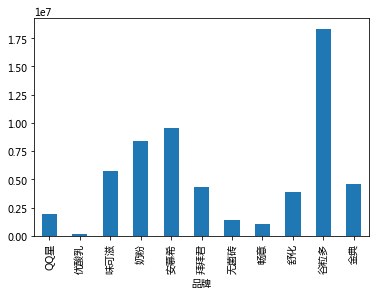

In [22]:
yili_0813.groupby('品牌').销售额.sum().plot(kind='bar')

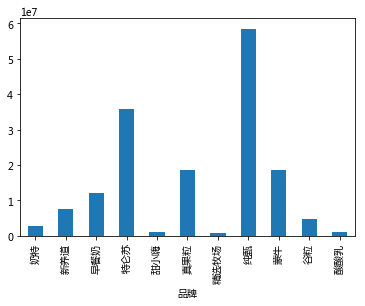

In [123]:
meng_0813.groupby('品牌').销售额.sum().plot(kind='bar')

In [23]:
yili_0813.groupby('品牌').sum().sort_values(by='销量', ascending=False)
meng_0813.groupby('品牌').sum().sort_values(by='销量', ascending=False)

,价格,销量,销售额
品牌,,,
奶粉,1172.325,2931401,8354301.2
谷粒多,211.500,1626048,18338839.0
味可滋,375.000,346988,5758320.0
安慕希,267.000,248512,9552873.2
舒化,297.000,220058,3912427.2
金典,255.275,146937,4591424.2
拜拜君,139.800,84672,4349503.2
QQ星,343.600,42068,1942897.4
畅意,110.025,41403,1084553.1


,价格,销量,销售额
品牌,,,
纯甄,341.9000,1741366,58463270.2
特仑苏,481.3000,1106845,35777333.9
真果粒,166.9750,719355,18700613.6
谷粒,129.0000,512286,4790980.8
蒙牛,238.5000,423290,18562290.3
早餐奶,127.7000,285767,12198879.3
新养道,126.0375,204318,7557184.5
奶特,150.0000,54742,2737100.0
酸酸乳,79.8000,23540,939246.0


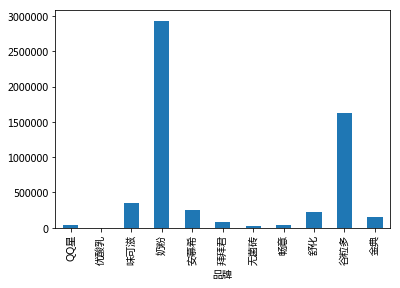

In [24]:
yili_0813.groupby('品牌').销量.sum().plot(kind='bar')

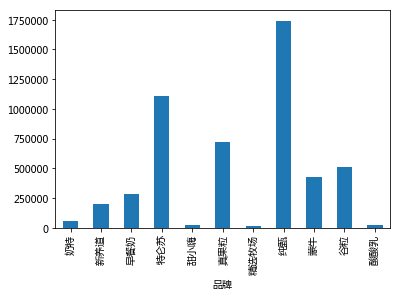

In [25]:
meng_0813.groupby('品牌').销量.sum().plot(kind='bar')